In [754]:
import matplotlib.pyplot as plt #pyplot
from mpl_toolkits.mplot3d import Axes3D #3d axis for kent distribution only

import numpy as np #scientific computing 

#Scientific compuyting algorithms
from scipy import optimize
from scipy import stats
from scipy import special

#iminuit
from iminuit import Minuit, cost


# uniform

In [755]:
def uniform(xe, s):
    return n * s * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, s=0) # initial paramters for fit
    m.limits["s"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m
                     

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 120.3 (chi2/ndof = 6.3)    │              Nfcn = 43               │
│ EDM = 3.7e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

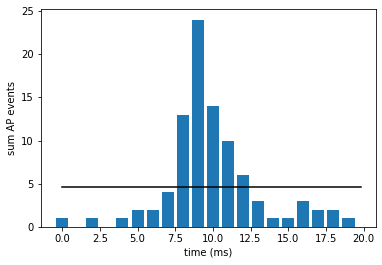

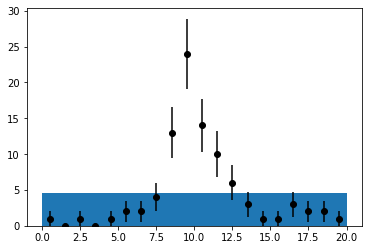

In [756]:
data = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1])
sumw = np.sum(data)
n = np.sum(data)
xe = np.arange(0,data.shape[0]+1,1)
bins = np.arange(0,data.shape[0])
interp = np.arange(0,data.shape[0],.1)

#data
c = cost.ExtendedBinnedNLL(data, xe, uniform)
m = fit(c)
print(m)

#graph the data
plt.bar(bins, data)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.plot(interp[:-1], np.diff(uniform(interp, *m.values))*interp.shape[0]/len(data), label="fit", color='k')
plt.show()

m.visualize()


## Gaussian distribution

In [4]:
def gaussianUniform(xe, z, mu, sigma):
    return (1-z) * n * stats.norm.cdf(xe, mu, sigma) + z * n * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, z=0, mu=1, sigma=0.1) # initial paramters for fit
    m.limits["z", "mu", "sigma"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m 

(20,)
(21,)
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.82 (chi2/ndof = 0.7)    │              Nfcn = 277              │
│ EDM = 3.37e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬───

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.82 (chi2/ndof = 0.7)    │              Nfcn = 277              │
│ EDM = 3.37e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.28    │   0.07    │            │            │    0    │   20    │       │
│ 1 │ mu    │   9.92    │   0.21    │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.39    │   0.20    │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        z       mu    sigma │
├───────┼────────────────────────────┤
│     z │   0.0047 -0.00115 -0.00568 │
│    mu │ -0.00115   0.0433  0.00387 │
│ sigma │ -0.00568  0.00387    0.039 │
└───────┴────────────────────────────┘

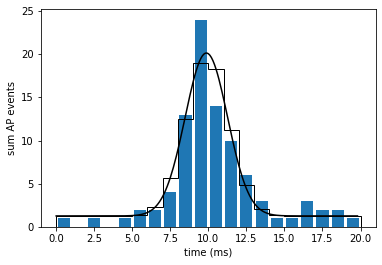

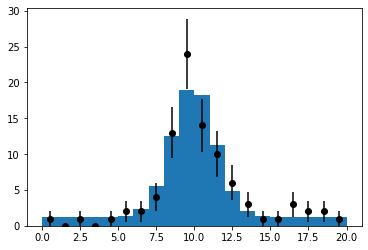

In [5]:
w = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1]) #data
n = np.sum(w)#total number of events
xe = np.arange(0,w.shape[0]+1,1) #bins (every 1 ms)
print(w.shape)
print(xe.shape)

interp = np.arange(0, w.shape[0],.1) #interpelation between bins (every 0.1 ms)

#set the cost funnction and run the fit
c = cost.ExtendedBinnedNLL(w, xe, gaussianUniform)
m = fit(c)
print(m) #this is will use basic graphics
display(m) #this will use built in graphics with colors

#graph the data with pyplot
plt.bar(xe[:-1]+0.5, w) #bins plotted against datapoints
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')
plt.stairs(np.diff(gaussianUniform(xe, *m.values)), xe, label="fit", color='k') #histogram fit
plt.plot(interp[:-1], np.diff(gaussianUniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit
plt.show()

#use the wrapper to visualize the fit
m.visualize()



## von Mises 

In [6]:
def vonMises(xe, kappa, loc, scale):
    return n * stats.vonmises.cdf(xe, kappa, loc, scale)

def fit(c):
    m = Minuit(c, kappa=1, loc=0.5, scale=0.1) # initial paramters for fit
    m.limits['kappa', 'scale'] = (0, 10)
    m.limits['loc'] = (-np.pi, np.pi) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.86 (chi2/ndof = 0.9)    │              Nfcn = 130              │
│ EDM = 2.41e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.86 (chi2/ndof = 0.9)    │              Nfcn = 130              │
│ EDM = 2.41e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa │   0.52    │   0.11    │            │            │    0    │   10    │       │
│ 1 │ loc   │   0.95    │   0.18    │            │            │-3.14159 │ 3.14159 │       │
│ 2 │ scale │   0.85    │   0.07    │            │            │    0    │   10    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │     kappa       loc     scale │
├───────┼───────────────────────────────┤
│ kappa │    0.0129 -0.000203 -0.000214 │
│   loc │ -0.000203    0.0335   0.00258 │
│ scale │ -0.000214   0.00258   0.00501 │
└───────┴───────────────────────────────┘

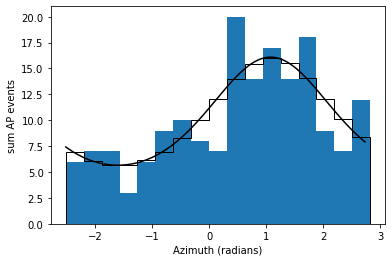

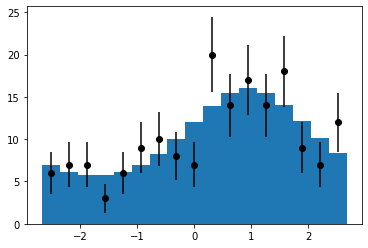

In [7]:
w = np.array([ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.])
# azim = np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
azim = np.arange(-144-9, 144+10, 18)
xe = azim * (np.pi/180)
interp = np.arange(xe[0],xe[-1],.05)

#data
n = np.sum(w)
c = cost.ExtendedBinnedNLL(w, xe, vonMises)
m = fit(c)
print(m)
display(m)
#print the fit parameters


#graph the data
binwidth = 18*np.pi/180
plt.bar(xe[:-1]+binwidth, w, width=binwidth)
plt.xlabel('Azimuth (radians)')
plt.ylabel('sum AP events')
plt.stairs(np.diff(vonMises(xe, *m.values)), xe+binwidth/2, label="fit", color='k') #histogram fit
plt.plot(interp[:-1]+binwidth/2, np.diff(vonMises(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit
plt.show()

#use the wrapper to visualize the fit
m.visualize()

## Kent distribution

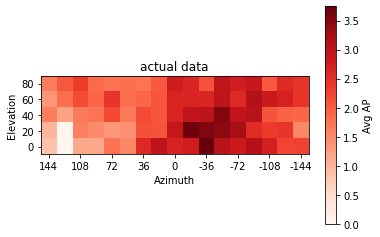

[[0.84292303 0.         1.14734145 1.15091077 1.77655304 1.52596289
  2.57011505 2.96656859 2.6500923  2.74047342 3.74508562 3.03211337
  2.78346531 3.06597099 2.69166461 2.23943587 2.26513877]
 [0.98059515 0.         1.6275763  1.48798925 1.34084135 1.43160212
  2.12376277 2.10096769 2.89103893 3.66651913 3.541838   3.43942793
  3.22033054 2.54330932 2.35264848 2.41664932 1.52537226]
 [1.62645954 1.20768052 1.66918371 1.72864708 2.19863674 1.67685588
  2.16606316 2.06919193 2.64761296 2.91217813 2.99349066 3.52475481
  2.91911213 3.03664866 2.08943531 1.93142718 1.90408669]
 [1.35030823 1.82230996 2.17498415 1.91150192 2.41349861 1.80954587
  1.90258315 2.0694286  2.63482981 2.63281628 2.61129913 2.96372531
  2.56029614 3.0955314  2.78677583 2.66617395 2.41625989]
 [1.66147125 2.0395933  2.3372948  1.86223527 1.78377435 1.81649469
  1.75178417 2.03463907 2.75796229 2.61632312 2.11668204 2.93054356
  2.72603568 2.83744516 2.03623635 2.55846111 2.42579219]]


In [757]:
def sphericalUnit(theta, phi):
    # this function gives a unit vectors of spherical coordinates.
    # the notation is based on Arfken
    # theta is polar angle
    # phi is azimuthal angle.

    st = np.sin(theta);
    ct = np.cos(theta);
    sp = np.sin(phi);
    cp = np.cos(phi);

    unitvecs = np.array([[st * cp,  ct * cp, -sp],
                [st * sp,  ct * sp,  cp],
                [ct,      -st,      0]])
    
    return unitvecs


def kent(xe, height, beta, kappa, gamma1, gamma2, gamma3):
#     kent_dist = height * np.exp(kappa * np.dot(xyz, gamma1) + 
#             beta * (np.dot(xyz, gamma2)**2 - np.dot(xyz, gamma3)**2))  
#     xe = xe.T
    kent_dist = height * np.exp(-kappa) * np.exp(kappa * gamma1.dot(xe) + 
            beta * kappa * (gamma2.dot(xe)**2 - gamma3.dot(xe)**2)) 
    
    return np.squeeze(kent_dist)

def kentdist(xe, kappa, beta, theta, phi, alpha, height):
    units = sphericalUnit(theta, phi)
    gamma1 = units[:,0]

    gamma2 = rodrot(units[:,1], units[:,0], alpha)
    gamma3 = rodrot(units[:,2], units[:,0], alpha)
    
    return kent(xe, height, beta, kappa, gamma1, gamma2, gamma3)


#elevation
thetarad = 75*np.pi/180
#azimuth
phirad = (45+90)*np.pi/180

#kappa, beta, theta, phi, alpha, height
params = [0.75, 0, thetarad, phirad, 0, 3]
units = sphericalUnit(params[2], params[3])
w = kentdist(xs[:,:3].T, *params).reshape(w.shape)+np.random.random(85).reshape(w.shape)
w[:2,1] = 0 
maxval = np.max(w)
minval = 0

plt.imshow(w[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.title('actual data')
plt.colorbar(label='Avg AP')
plt.xticks(np.arange(len(azimdeg))[::2], azimdeg[::2])
plt.xlabel('Azimuth')
plt.ylabel('Elevation')
plt.yticks(np.arange(len(elevdeg)), 90-elevdeg[::-1])
plt.show()

print(w)

In [818]:
def cart2sph(x,y,z):
    XsqPlusYsq = x**2 + y**2
    r = np.sqrt(XsqPlusYsq + z**2)               # r
    elev = np.arctan2(z, np.sqrt(XsqPlusYsq))     # theta
    az = np.arctan2(y,x)                           # phi
    return r, elev, az

def sph2cart(theta, phi):
    # this returns cartesian coord based on the spherical coordinates.
    # this assumes a unit circle
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

def rodrot(targetvector, rotationaxis, angle):
    # this function does rotation of a vector in 3d space accordingly to
    # Rodrigues rotation formula.
    r1 = targetvector*np.cos(angle)
    r2 = np.cross(rotationaxis, targetvector) * np.sin(angle)
    r3 = rotationaxis * (np.transpose(rotationaxis) * targetvector) * (1 - np.cos(angle))
     
    return np.squeeze(r1 + r2 + r3)\

def kentRandStart(limits):
    kappa = np.random.uniform(limits[0][0], limits[1][0], size=1)
    beta = np.random.uniform(limits[0][1], limits[1][1], size=1)
    theta = np.random.uniform(limits[0][2], limits[1][2], size=1)
    phi =  np.random.uniform(limits[0][3], limits[1][3], size=1)
    alpha = np.random.uniform(limits[0][4], limits[1][4], size=1)
    height = np.random.uniform(limits[0][5], limits[1][5], size=1)
    # base = np.random.uniform(low=0, high=100, size=1)
    
    params = np.array([kappa, beta, theta, phi, alpha, height])
#, base
   
    return np.squeeze(params)

def kentRandStartFit(c, limits):
#     kappa = stats.truncnorm.rvs(0, 10, size=1)
    kappa = np.random.uniform(0,10, size=1)
    beta = np.random.uniform(low=-0.5, high=0.5, size=1)
#     beta = stats.truncnorm.rvs(-0.5, 0.5, 
#                               loc = 0, scale = 0.1, size=1)
    theta = np.random.uniform(low=0, high=np.pi/2, size=1)
#     theta = stats.truncnorm.rvs(0, np.pi/2, 
#                               loc = 0, scale = 0.25, size=1)
    phi =  np.random.uniform(low = -2 * np.pi, high = 2 * np.pi, size=1)
#     phi = stats.truncnorm.rvs(-2 * np.pi, 2 * np.pi,
#                               loc = 0, scale = 0.25, size=1)
    alpha = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=1)
#     alpha = stats.truncnorm.rvs( -np.pi, np.pi, size=1)
    height = np.random.uniform(low=0, high =200, size=1)
#     height = stats.truncnorm.rvs(0, 1, size=1)
    
    
#     kappa=2
#     beta=0.25
#     theta=1.5
#     phi=-1.5
#     alpha=1
#     height=90
    param = kentRandStart(limits)

    
    m = Minuit(c, *param) # initial paramters for fit
    m.limits['kappa'] = (limits[0][0], limits[1][0])
    m.limits['beta'] = (limits[0][1], limits[1][1])
    m.limits['theta'] = (limits[0][2], limits[1][2])
    m.limits['phi'] =  (limits[0][3], limits[1][3])
    m.limits['alpha'] =  (limits[0][4], limits[1][4])
    m.limits['height'] = (limits[0][5], limits[1][5])    
    m.migrad() #gradient descent
#     m.minos()
#     assert m.valid
    
    return m

def kentAproxStartFit(c, xe, y):
    
    height = np.max(y)
    print(height)
    index = np.where(y==height)[0]
    print(index)
    x, y ,z = xe[:, index]
    print(x,y,z)
    r, elev, azim = cart2sph(x,y,z)
    print(r, elev, azim)
    
    try:
        kappa = 1
        beta = 0
        theta = elev[1]
        phi = azim[0]
        alpha = 0
    except:
        kappa = 1
        beta = 0
        theta = elev
        phi = azim
        alpha = 0
    
    m = Minuit(c, kappa=kappa, beta=beta, theta=theta, phi=phi, alpha=alpha, height=height) # initial paramters for fit
    m.limits['kappa'] = (0, 100)
    m.limits['beta'] = (0, 3)
    m.limits['theta'] = (0, np.pi/2)
    m.limits['phi'] =  (-np.pi, np.pi)
    m.limits['alpha'] =  (-np.pi/2, np.pi/2)
    m.limits['height'] = (0,200)    
    m.migrad() #gradient descent
    assert m.valid
    
    return m

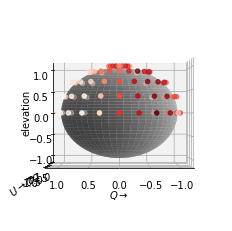

False


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = inf (chi2/ndof = inf)      │              Nfcn = 484              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kappa  │ 1.6564e1  │    nan    │            │            │    0    │   100   │       │
│ 1 │ beta   │ 6.7533e-2 │    nan    │            │            │  -0.5   │   0.5   │       │
│ 2 │ theta  │  3.5206   │    nan    │            │            │-0.785398│ 4.71239 │       │
│ 3 │ phi    │-5.0481e-1 │    nan    │            │            │-3.14159 │ 3.14159 │       │
│ 4 │ alpha  │ 4.5272e-1 │    nan    │            │            │-6.28319 │ 6.28319 │       │
│ 5 │ height │ 4.2152e1  │    nan    │            │            │    0    │   100   │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────┐
│        │  kappa   beta  theta    phi  alpha height │
├────────┼───────────────────────────────────────────┤
│  kappa │    nan    nan    nan    nan    nan    nan │
│   beta │    nan    nan    nan    nan    nan    nan │
│  theta │    nan    nan    nan    nan    nan    nan │
│    phi │    nan    nan    nan    nan    nan    nan │
│  alpha │    nan    nan    nan    nan    nan    nan │
│ height │    nan    nan    nan    nan    nan    nan │
└────────┴───────────────────────────────────────────┘

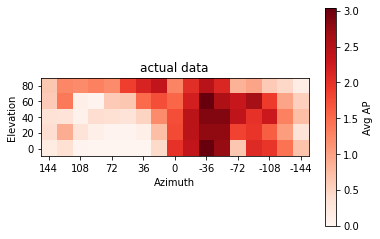

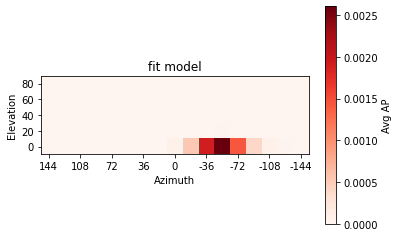

In [851]:
# w = np.array([[ 7.,  2.,  2.,  3.,  1.,  2.,  3.,  8.,  3., 15., 15., 14., 17., 13., 10.,  6.,  2.],
#               [ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.]])

w = np.array([[0.16666667,0.36666667,0.03333333, 0., 0., 0., 0., 0.43333333, 2., 2.36666667, 3.03333333, 
               2.73333333,  0.63333333, 2.06666667, 1.96666667, 1.43333333, 0.66666667],
              [0.4, 0.9, 0.3, 0.1, 0.03333333, 0.03333333, 0.1, 0.73333333, 1.76666667, 
               2.43333333, 2.76666667, 2.76666667, 1.83333333, 1.96666667, 1.6, 1.03333333, 0.3],
              [0.33333333, 0.3, 0.06666667, 0.4, 0.36666667, 0.3, 0.5, 1.2, 1.73333333, 2.43333333, 
               2.86666667, 2.86666667, 2.4, 2., 2.26666667, 1.3, 0.73333333],
              [0.6, 1.36666667, 0.1, 0.03333333, 0.6, 0.63333333, 1.5, 1.73333333, 1.53333333,
               2.2, 3.03333333, 2.56666667, 2.3, 2.63333333, 1.9, 0.96666667, 0.53333333],
              [0.63333333, 1.23333333, 1.2, 1.3, 1.2, 1.86666667, 2.13333333, 2.36666667,
               1.26666667, 2.03333333, 2.46666667, 2.1, 0.83333333, 0.96666667, 0.6, 0.46666667, 0.13333333]])
yerror = w.copy()
yerror[w==0]=1/30
# w = np.round(w,0)

azimdeg = -1*np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
# elevdeg = 90-np.array([0,40])
elevdeg = 90-np.array([0,20,40,60,80])
azim = azimdeg*np.pi/180
elev = elevdeg*np.pi/180

def grid3d(gridsize = 200):

    u = np.linspace(0, 2 * np.pi, gridsize)
    v = np.linspace(0, np.pi, gridsize)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
#     keys = list()
#     points = list()
#     for i in range(gridsize):
#         for j in range(gridsize):
#             points.append([x[i, j], y[i, j], z[i, j]])
#             keys.append((i, j))
#     points = np.array(points)

#     value_for_color = np.ones(gridsize)
#     colors = np.empty((gridsize, gridsize), dtype=tuple)
#     for i, j in keys:
#         colors[i, j] = (1.0, 1.0, 1.0, 1.0)
        
    return x, y, z#, points, colors

def azimElevCoord(azim, elev, data):
    corz = np.cos(elev)
    xs = np.zeros([elev.shape[0]*azim.shape[0],4])
    n=0
    
    for k in np.arange(corz.shape[0]):
        corx = np.sin(elev[k])*np.sin(azim)
        cory = np.sin(elev[k])*np.cos(azim)
        for i in np.arange(corx.shape[0]):
            xs[n,0] = corx[i]
            xs[n,1] = cory[i]
            xs[n,2] = corz[k]
            xs[n,3] = data[k,i]
            n+=1
    return xs

#plot the data points on a sphere
maxval = np.max(w)
minval = 0
x, y, z = grid3d(gridsize = 200)
xs = azimElevCoord(azim, elev, w)
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
xx, yy, zz, colors = list(zip(*xs))  # plot only a portion of these values
ax.scatter(1.05 * np.array(xx), 1.05 *
           np.array(yy), 1.05 * np.array(zz), c=colors, cmap='Reds', vmin=0, vmax=maxval)
ax.plot_surface(x, y, z, rstride=4, cstride=4,
                color='lightgray',
#             facecolors=colors, 
            linewidth=0)
ax.set_xlabel(r"$Q\rightarrow$")
ax.set_ylabel(r"$U\rightarrow$")
ax.set_zlabel('elevation')
ax.view_init(0,90)
plt.show()




#fit the model
interp = np.arange(azim[0],azim[-1],.1)
y = xs[:,3]
xe = xs[:,:3].T
c = cost.LeastSquares(xe, y, yerror=y, model=kentdist, loss='soft_l1')
c._ndim = 3
limits = ((0  , -0.5, -np.pi/4, -np.pi, -2*np.pi, 0),
          (100,  0.5,  3*np.pi/2,  np.pi,  2*np.pi, 100))
m = kentRandStartFit(c, limits)
# print(y.shape, xe.shape)
# m = kentAproxStartFit(c, xe, y)

print(m.valid)
display(m)
# #graph the data


plt.imshow(w[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.title('actual data')
plt.colorbar(label='Avg AP')
plt.xticks(np.arange(len(azimdeg))[::2], azimdeg[::2])
plt.xlabel('Azimuth')
plt.ylabel('Elevation')
plt.yticks(np.arange(len(elevdeg)), 90-elevdeg[::-1])
plt.show()

fitdist = kentdist(xs[:,:3].T, *m.values).reshape(w.shape)
maxval = np.max(fitdist)
minval = 0

plt.imshow(fitdist[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.title('fit model')
plt.colorbar(label='Avg AP')
plt.xticks(np.arange(len(azimdeg))[::2], azimdeg[::2])
plt.xlabel('Azimuth')
plt.ylabel('Elevation')
plt.yticks(np.arange(len(elevdeg)), 90-elevdeg[::-1])
plt.show()

    # m.covariance.correlation() 
    # print(dir(m))

In [11]:
print(m.errors)

<ErrorView kappa=0.23691495376054816 beta=0.14068718643996234 theta=0.15471720310162274 phi=0.03390719105069895 alpha=0.3849990809076792 height=2.3159386799739883>


In [32]:
dir(m.valid)
# print(m.tol)
# kentdist(xs[:,:3].T, *m.values)-
dir(m)

['LEAST_SQUARES',
 'LIKELIHOOD',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_copy_state_if_needed',
 '_covariance',
 '_draw_profile',
 '_edm_goal',
 '_errors',
 '_fcn',
 '_fixed',
 '_fmin',
 '_fmin_does_not_exist_or_last_state_was_modified',
 '_free_parameters',
 '_init_state',
 '_last_state',
 '_limits',
 '_make_covariance',
 '_merrors',
 '_migrad_maxcall',
 '_mnprecision',
 '_normalize_bound',
 '_pos2var',
 '_precision',
 '_repr_html_',
 '_repr_pretty_',
 '_strategy',
 '_tolerance',
 '_values',
 '_var2pos',
 '_visualize',
 'accurate',
 'contour',
 'covariance',
 'draw_contour',
 'draw_mncontour',
 'draw_mnmatrix',
 'draw_mnprofile',
 'draw_profile',
 'erro

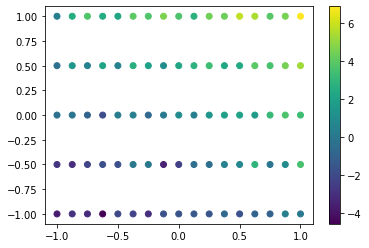

In [66]:
def model2(x_y, a, bx, by):
    x, y = x_y
    return a + bx * x + by * y

# generate a regular grid in x and y
x = np.linspace(-1, 1, 17)
y = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()

# model truth
Z = model2((x, y), 1, 2, 3)

# add some noise
rng = np.random.default_rng(1)
Zerr = 1
Z = rng.normal(Z, Zerr)

plt.scatter(x, y, c=Z)
plt.colorbar();

In [69]:
c2 = cost.LeastSquares((x, y), Z, Zerr, model2, 'soft_l1')
m2 = Minuit(c2, 0, 0, 0)
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 45.33 (chi2/ndof = 0.6)    │              Nfcn = 76               │
│ EDM = 4.2e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.94    │   0.14    │            │            │         │         │       │
│ 1 │ bx   │   2.07    │   0.23    │            │            │         │         │       │
│ 2 │ by   │   2.87    │   0.19    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │         a        bx        by │
├────┼───────────────────────────────┤
│  a │    0.0187 -0.000752   0.00173 │
│ bx │ -0.000752    0.0521  -0.00011 │
│ by │   0.00173  -0.00011    0.0376 │
└────┴───────────────────────────────┘

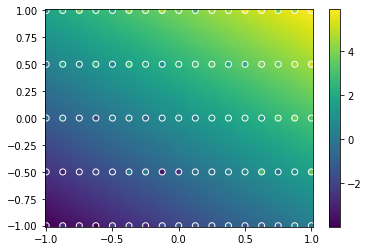

In [70]:
xm = np.linspace(-1, 1, 100)
ym = np.linspace(-1, 1, 100)
Xm, Ym = np.meshgrid(xm, ym)
xm = Xm.flatten()
ym = Ym.flatten()

qm = plt.pcolormesh(Xm, Ym, model2((xm, ym), *m2.values).reshape(Xm.shape))
plt.scatter(c2.x[0], c2.x[1], c=c2.y, edgecolors="w", norm=qm.norm)
plt.colorbar();